# Word frequency across time and register in 19th century Australian English

The Corpus of Oz Early English (COOEE) is a collection of textual material produced in Australia between 1788 and 1900. It is divided into four time periods (1788-1825, 1826-1850, 1851-1875, 1876-1900) and four registers (Private Written, Public Written, Government English, Speech Based). This notebook generates plots of the relative frequency of occurrence of words across the four time periods, showing frequency for each register separately. 

We will use the ggplot2 package to produce the visualisation. If you do not have the package installed, you will need to run the line of code in the next cell. After the package is installed, you can then go to the second following cell. If you already have ggplot2 installed, you can skip the immediately following cell.

In [ ]:
# install the package if you need to
install.packages("ggplot2")

In [82]:
# activate the package
library(ggplot2)

The basic data for this exercise is frequency lists for each of the 16 sub-corpora of COOEE which can be specified by the design of the corpus. More specifically, the frequencies are **normalised** per 10,000 tokens so that the numbers can be compared meaningfully. The data is provided as a csv file, and the next cell reads the data into R and displays the structure of the resulting data frame.

In [83]:
# read data from file - specify path to local copy of data file
cooee_data <- read.csv("F:/Corpus Data/COOEE/cooee_slices_normalised_freq.csv")
str(cooee_data)

'data.frame':	16 obs. of  3971 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dear               : num  1.79 0 0 0 0 ...
 $ sir                : num  3.57 0 0 0 1.62 ...
 $ ni                 : num  1.79 0 0 0 3.24 ...
 $ pleasure           : num  0.893 0 0 0 0 ...
 $ sending            : num  0.893 0 0 0 0 ...
 $ seeds              : num  2.68 0 0 0 0 ...
 $ gladly             : num  0.893 0 0 0 0 ...
 $ sent               : num  1.79 1.72 0 3.64 0 ...
 $ larger             : num  0.893 0 0 0 0.81 ...
 $ quantity           : num  0.893 0 0 0 0 ...
 $ person             : num  0.893 0.859 0 0 3.239 ...
 $ employed           : num  0.893 0 0 0 0 ...
 $ either             : num  0.893 0 0 0 0 ...
 $ neglected          : num  0.893 0 0 0 0 ...
 $ collecting         : num  0.893 0 0 0 0 ...
 $ proper             : num  0.893 3.438 0 0 0 ...
 $ time               : num  0.893 5.157 3.623 1.819 3.239 ...
 $ late               : num  0.893 0 0.906 0 1.619 ...
 $ season   

ggplot needs the data to be in a particular structure in order to plot a line graph with multiple lines. The next code cell lets you enter a word as the target for a plot and checks whether that word occurs in the data set. If the word is present, a dataframe (table) with the relevant data in the required structure is produced and displayed.

In [84]:
# enter word as target for visualisation

target <- "country"

if (target %in% colnames(cooee_data)) {
# get the index of the column corresponding to the target word
    search_target <- paste0('^', target, '$')
    column_index <- grep(search_target, colnames(cooee_data))
    #retrieve data
    plot_data <- cooee_data[, column_index]
    plot_data <- rbind(plot_data, cooee_data$time_period)
    plot_data <- rbind(plot_data, cooee_data$text_register)

    #transpose data frame, add column names and reorder columns
    plot_data_long <- as.data.frame(t(plot_data))
    colnames(plot_data_long) <- c('norm_freq', 'time', 'register')
    plot_data_long <- plot_data_long[, c(2,3,1)]
    plot_data_long
    } else {
    print('That word does not occur in the data set')
}





time,register,norm_freq
<chr>,<chr>,<chr>
1,Private Written,4.46388715293277
1,Public Written,3.43790287924366
1,Government English,4.52816518746604
1,Speech Based,0
2,Private Written,6.47720832321269
2,Public Written,4.16181122024305
2,Government English,0.904404449669892
2,Speech Based,1.65727543917799
3,Private Written,0


The final cell calls ggplot to generate a visualisation of the data.

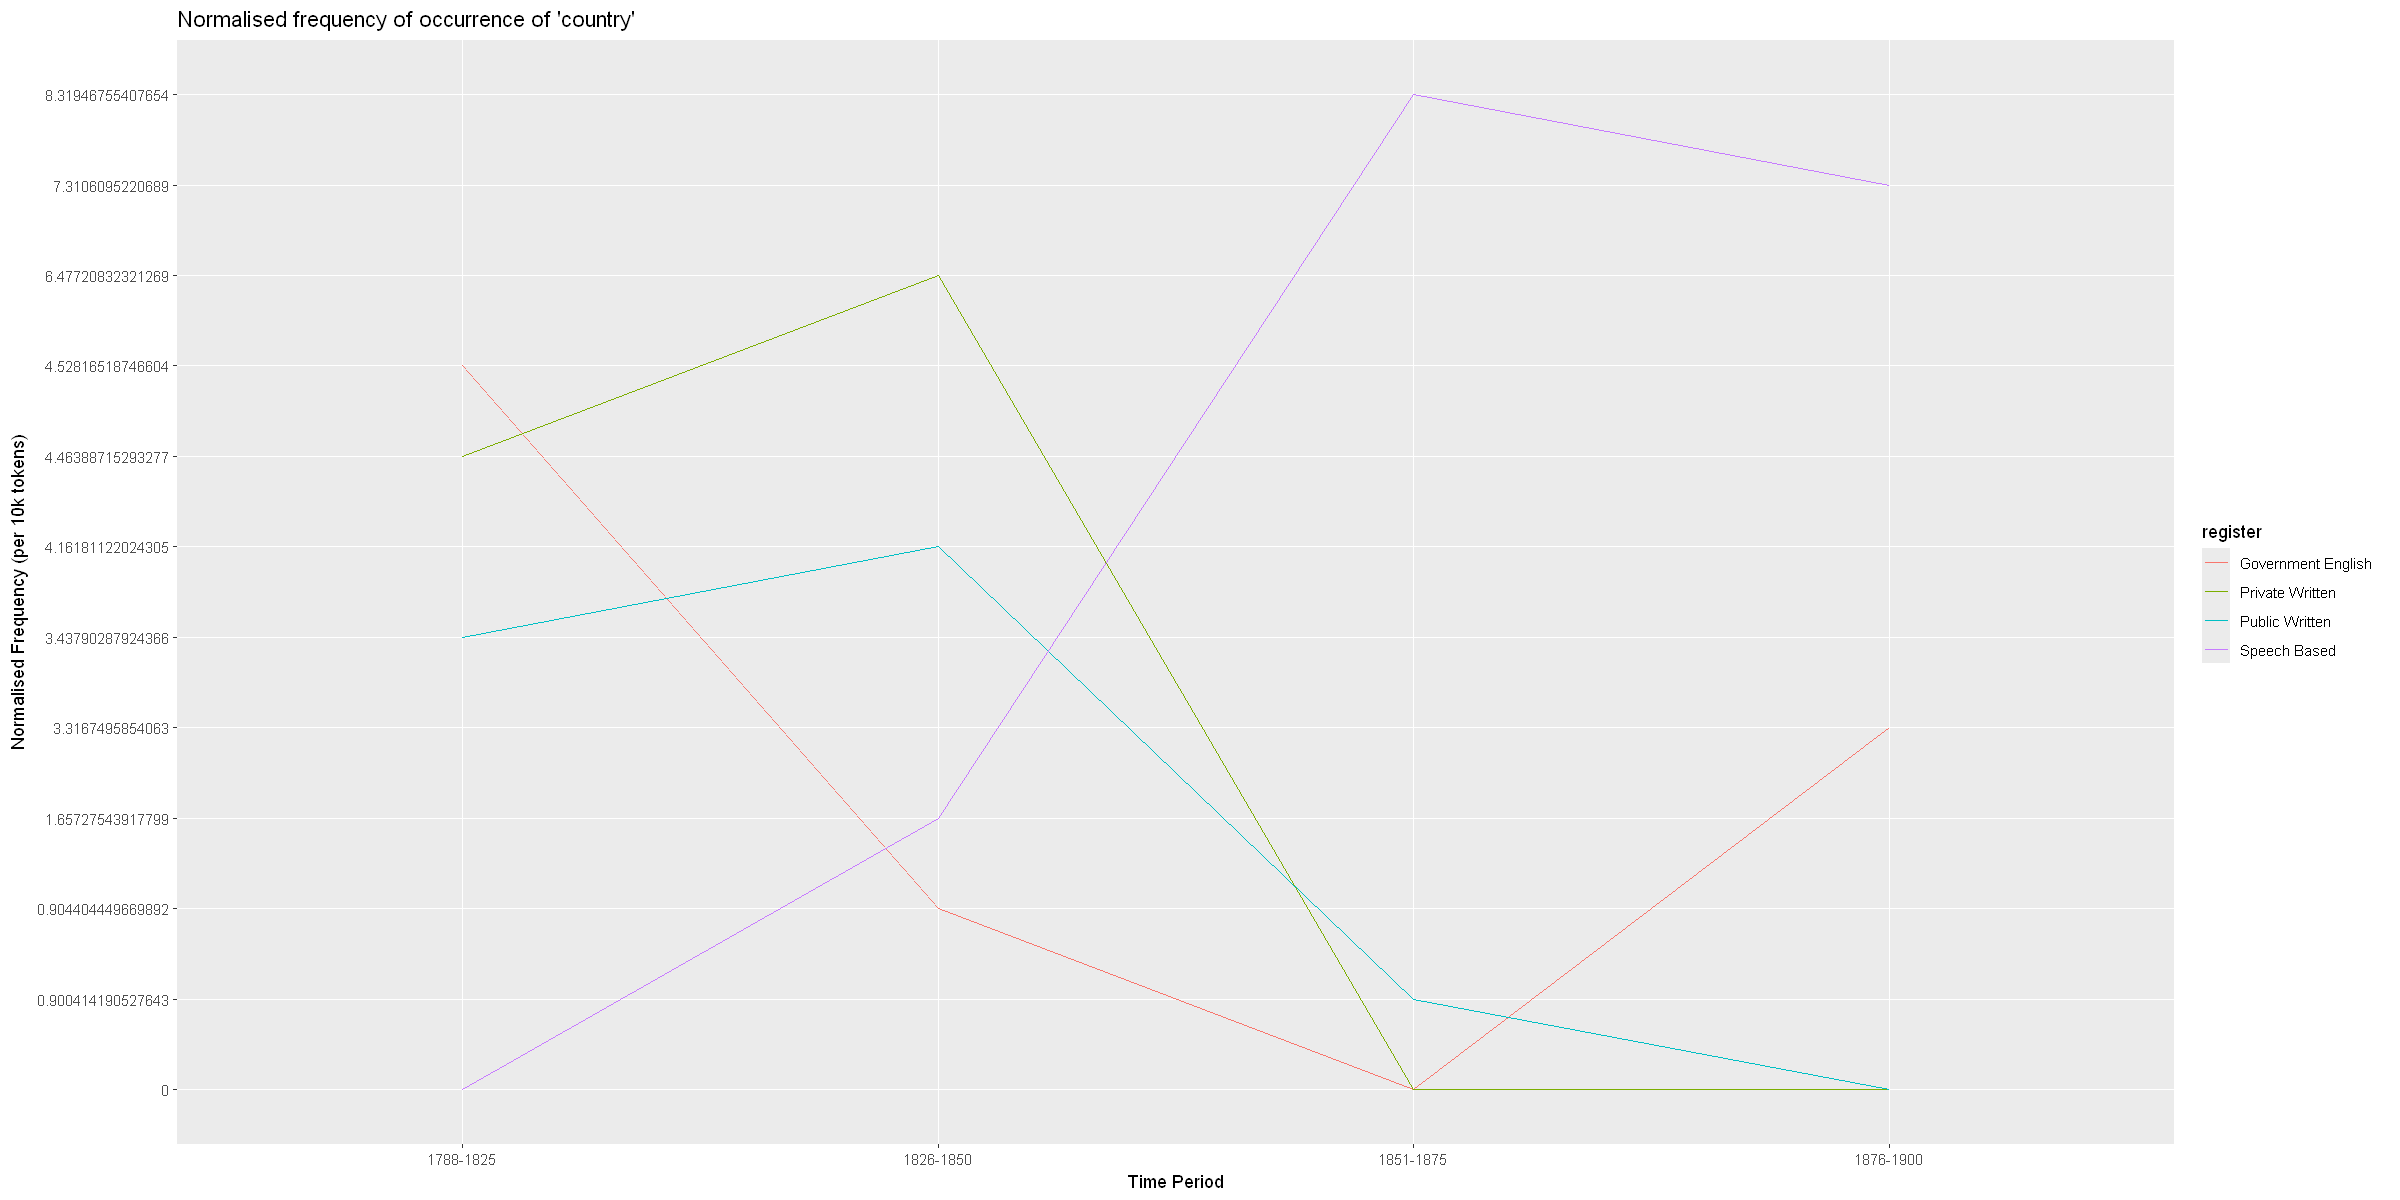

In [85]:
# plot the data

time_labels <- c('1788-1825', '1826-1850', '1851-1875', '1876-1900')
title <- paste0("Normalised frequency of occurrence of '", target, "'")

options(repr.plot.width = 20, repr.plot.height =10)
ggplot(plot_data_long, aes(x = time, y = norm_freq, col = register, group = register)) + 
  geom_line() + labs(x = "Time Period", y = "Normalised Frequency (per 10k tokens)") + scale_x_discrete(labels= time_labels) + ggtitle(title)